In [24]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
from tqdm import tqdm
np.random.seed(2025)

In [25]:
def uniform_sampling(T, K, means):
    rewards = np.zeros(K)
    for k in range(K):
        rewards[k] = np.sum(np.random.binomial(1, means[k], T // K))
    empirical_means = rewards / (T//K)
    return rewards, empirical_means

In [26]:
def successive_rejects(T, K, means):
    A = np.array(list(range(1, K+1)))
    REMOVE = []
    log_bar_K = 1/2 + np.sum([1/k for k in range(2, K+1)])
    n0 = 0
    for j in range(1, K):
        empirical_means = np.zeros(K)
        for index in REMOVE:
            empirical_means[index] = np.inf
        nj = math.floor((T-K) / (log_bar_K * (K + 1 - j)))
        for index, element in enumerate(A):
            if index not in REMOVE:
                empirical_means[index] = np.sum(np.random.binomial(1, means[index], nj)) / nj
        REMOVE.append(np.argmin(empirical_means))
    indices = []
    for ind in list(range(K)):
        if ind not in REMOVE:
            indices.append(ind)
    assert len(indices)==1
    return indices[0]

In [27]:
def run_experience(algorithm, T, K, means, n_iter=10**4):
    counter = np.zeros(K)
    for n in tqdm(range(n_iter)):
        if algorithm=="uniform_sampling":
            rewards, empirical_means = uniform_sampling(T, K, means)
            best_arm = np.argmax(empirical_means) 
        else:
            best_arm = successive_rejects(T, K, means)
        counter[best_arm] += 1
    counter /= n_iter
    p = 1 - np.sum(counter[1:])
    return p

100%|██████████| 10000/10000 [00:05<00:00, 1887.57it/s]


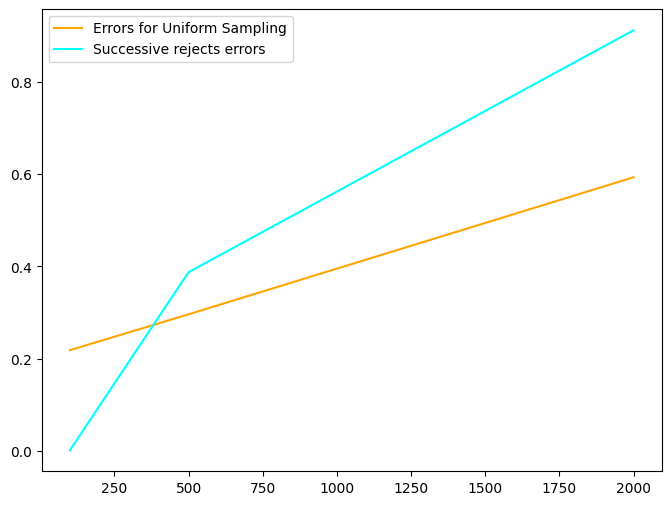

In [29]:
K = 20
means = [0.6] + [0.5] * (K-1)
Ts = [100, 500, 2000]
Usampling_errors = []
Srejects_errors = []

for T in Ts:
    p_error = run_experience(algorithm="uniform_sampling", T=T, K=K, means=means, n_iter=10**4)
    Usampling_errors.append(p_error)
    p_error_sr = run_experience(algorithm="successive_rejects", T=T, K=K, means=means, n_iter=10**4)
    Srejects_errors.append(p_error_sr)
    #print(f"\nT = {T}")
    #print(f"Probability of error for uniform sampling is: {p_error}")
    #print(f"Probability of error for successive rejects is: {p_error_sr}")

plt.figure(figsize=(8,6))
plt.plot(Ts, Usampling_errors, color='orange', label="Errors for Uniform Sampling")
plt.plot(Ts, Srejects_errors, color="cyan", label="Successive rejects errors")
plt.legend()
plt.show()

In [16]:
arms = [0.6, 0.7, 0.7, 0.4]
np.argmax(arms)


1